# Project : 6

# IPL data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from sklearn.utils import resample
from scipy.stats import shapiro, mannwhitneyu

In [3]:
# Load Datasets
match_data  = pd.read_csv('match_data.csv')
match_info_data = pd.read_csv('match_info_data.csv')
match_data.head()

C:\Users\Sahil Singh\AppData\Local\Temp\ipykernel_13260\18096143.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data  = pd.read_csv('match_data.csv')


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [4]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243817 non-null  int64  
 1   season                  243817 non-null  object 
 2   start_date              243817 non-null  object 
 3   venue                   243817 non-null  object 
 4   innings                 243817 non-null  int64  
 5   ball                    243817 non-null  float64
 6   batting_team            243817 non-null  object 
 7   bowling_team            243817 non-null  object 
 8   striker                 243817 non-null  object 
 9   non_striker             243817 non-null  object 
 10  bowler                  243817 non-null  object 
 11  runs_off_bat            243817 non-null  int64  
 12  extras                  243817 non-null  int64  
 13  wides                   7652 non-null    float64
 14  noballs             

In [5]:
# Enhanced Data Cleaning & Feature Engineering
match_info_data['date'] = pd.to_datetime(match_info_data['date'], errors='coerce')
team_runs_per_match = match_data.groupby(['match_id', 'batting_team'])['runs_off_bat'].sum().reset_index()
team_runs_per_match.rename(columns={'runs_off_bat': 'total_runs'}, inplace = True)
merged = pd.merge(team_runs_per_match, match_info_data[['id', 'date', 'venue', 'team1', 'team2']], left_on='match_id', right_on = 'id')
merged.drop(columns=['id'], inplace=True)
merged['Period'] = merged['date'].dt.year.apply(lambda x: 'Pre' if x < 2018 else 'Post')
merged['run_rate'] = merged['total_runs'] / 20.0
merged['year'] = merged['date'].dt.year

In [6]:
merged

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008
...,...,...,...,...,...,...,...,...,...,...
2040,1370351,Mumbai Indians,166,2023-05-24,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Lucknow Super Giants,Post,8.30,2023
2041,1370352,Gujarat Titans,223,2023-05-26,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Post,11.15,2023
2042,1370352,Mumbai Indians,164,2023-05-26,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Post,8.20,2023
2043,1370353,Chennai Super Kings,166,2023-05-29,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Chennai Super Kings,Post,8.30,2023


In [7]:
# Normality tests
pre_scores = merged[merged['Period'] == 'Pre']['total_runs']
post_scores = merged[merged['Period'] == 'Post']['total_runs']
pre_normality = shapiro(pre_scores.sample(n=500, random_state=1) if len(pre_scores) > 500 else pre_scores)
post_normality = shapiro(post_scores.sample(n=500, random_state=1) if len(post_scores) > 500 else post_scores)
print("Shapiro-Wilk Test (pre):", pre_normality)
print("Shapiro-Wilk Test (post):", post_normality)

Shapiro-Wilk Test (pre): ShapiroResult(statistic=0.988417764270504, pvalue=0.0005392374071367837)
Shapiro-Wilk Test (post): ShapiroResult(statistic=0.9845150224718922, pvalue=3.6348381261299446e-05)


Shapiro-Wilk Test Result: ShapiroResult(statistic=0.8508717526761667, pvalue=2.4377983226251065e-21)


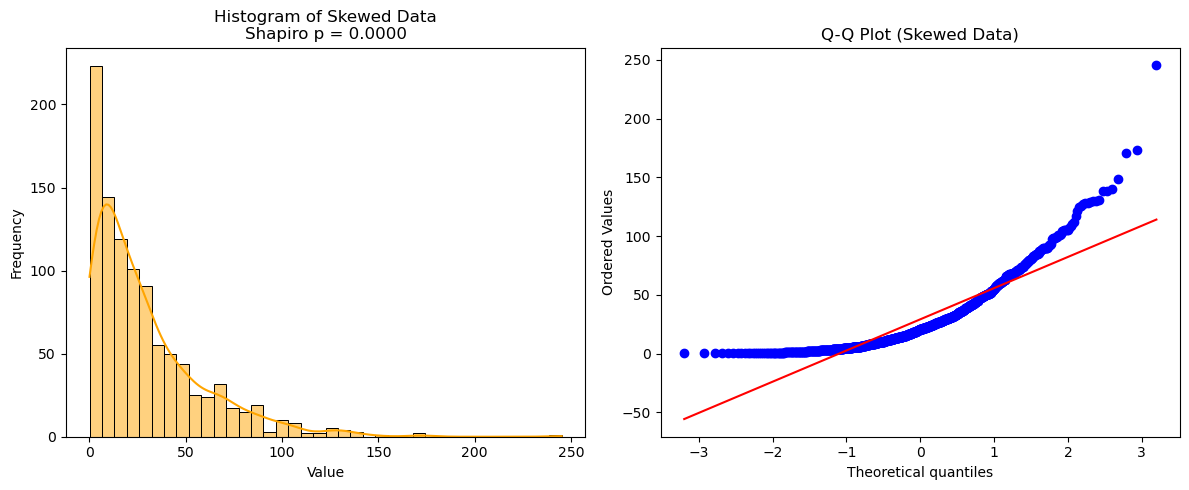

In [8]:
from scipy.stats import probplot
# Generate right-skewed data using exponential distribution
np.random.seed(42)
skewed_data = np.random.exponential(scale=30, size=1000)

# Shapiro-Wilk Test
shapiro_result = shapiro(skewed_data[:500])  # Limit to 500 for shapiro
print("Shapiro-Wilk Test Result:", shapiro_result)

# Plot histogram (not bell-shaped)
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.histplot(skewed_data, kde=True, color='orange')
plt.title(f"Histogram of Skewed Data\nShapiro p = {shapiro_result.pvalue:.4f}")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Plot Q-Q plot (won't be a straight line if not normal)
plt.subplot(1, 2, 2)
probplot(skewed_data, dist="norm", plot=plt)
plt.title("Q-Q Plot (Skewed Data)")

plt.tight_layout()
plt.show()

In [9]:
# Match type indicator (heuristic for playoffs)
match_counts = match_info_data.groupby(match_info_data['date'].dt.year)['id'].nunique().reset_index()
match_counts.columns = ['season', 'match_count']
match_info_data['season'] = match_info_data['date'].dt.year
match_info_data['match_number'] = match_info_data.groupby('season')['date'].rank(method='first',ascending=True)
match_counts.set_index('season', inplace=True)
match_info_data['match_count'] = match_info_data['season'].map(match_counts['match_count'])
match_info_data['is_playoff'] = match_info_data['match_number'] > (match_info_data['match_count'] - 4)
merged = pd.merge(merged, match_info_data[['id', 'is_playoff']], left_on='match_id', right_on='id')
merged.drop(columns=['id'], inplace=True)

merged

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year,is_playoff
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008,False
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008,False
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008,False
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008,False
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008,False
...,...,...,...,...,...,...,...,...,...,...,...
2040,1370351,Mumbai Indians,166,2023-05-24,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Lucknow Super Giants,Post,8.30,2023,True
2041,1370352,Gujarat Titans,223,2023-05-26,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Post,11.15,2023,True
2042,1370352,Mumbai Indians,164,2023-05-26,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Post,8.20,2023,True
2043,1370353,Chennai Super Kings,166,2023-05-29,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Chennai Super Kings,Post,8.30,2023,True


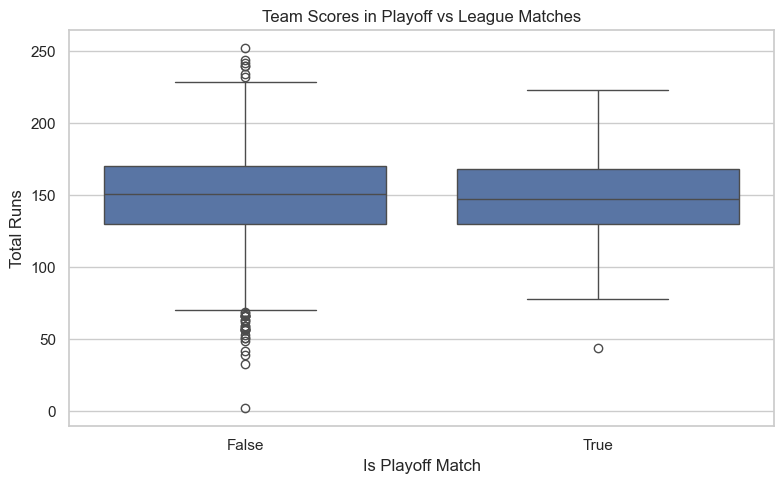

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
sns.set(style="whitegrid")

# 1. Average Runs in Playoffs vs League Matches
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='is_playoff', y='total_runs')
plt.title("Team Scores in Playoff vs League Matches")
plt.xlabel("Is Playoff Match")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

In [11]:
# Import required library
from scipy.stats import mannwhitneyu

# Seperate scores into two groups based on is_playoff flag
league_scores = merged[merged['is_playoff'] == False]['total_runs']
playoff_scores = merged[merged['is_playoff'] == False]['total_runs']

# Run the Mann-Whitney U test (non-parametric test for median difference)
u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')

# Display results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print(" The Difference in scores between playoffs and league matches is statistically significant.")
else:
    print(" No Statistically significant differnece in scores between playoffs and league matches.")

Mann-Whitney U Statistic: 1837444.5
P-value: 1.0
 No Statistically significant differnece in scores between playoffs and league matches.


In [12]:
from scipy.stats import mannwhitneyu

# Choose your team (edit this)
team_name = "Chennai Super Kings"

# Filter only this team's matches
team_data = merged[merged['batting_team'] == team_name]

# Separate scores by match type
league_scores = team_data[team_data['is_playoff'] == False]['total_runs']
playoff_scores = team_data[team_data['is_playoff'] == False]['total_runs']


# Mann-Whitney U Test 
u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')


# print results
print(f"Team: {team_name}")
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")


if p_value < 0.05:
    print(" The Difference in scores between playoffs and league matches is statistically significant.")
else:
    print(" No Statistically significant differnece in scores between playoffs and league matches.")

Team: Chennai Super Kings
Mann-Whitney U Statistic: 19404.5
P-value: 1.0
 No Statistically significant differnece in scores between playoffs and league matches.


# Mann-Whitney U Test for Multiple teams

In [13]:
teams = merged['batting_team'].unique()

for team in teams:
    team_data = merged[merged['batting_team'] == team]
    league_scores = team_data[team_data['is_playoff'] == False]['total_runs']
    playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

    if len(playoff_scores) >= 3 and len(league_scores) >= 3:   # avoid tiny samples
        u_stat, p_val = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')
        print(f"{team}: p = {p_val:.4f} {'✔' if p_val < 0.05 else'❌'}")

Kolkata Knight Riders: p = 0.8206 ❌
Royal Challengers Bangalore: p = 0.4337 ❌
Chennai Super Kings: p = 0.3327 ❌
Kings XI Punjab: p = 0.6591 ❌
Delhi Daredevils: p = 0.0892 ❌
Rajasthan Royals: p = 0.8971 ❌
Mumbai Indians: p = 0.4349 ❌
Deccan Chargers: p = 0.0997 ❌
Sunrisers Hyderabad: p = 0.7162 ❌
Delhi Capitals: p = 0.9859 ❌
Gujarat Titans: p = 0.4976 ❌


# Run Rate Trends in Playoff vs League Matches

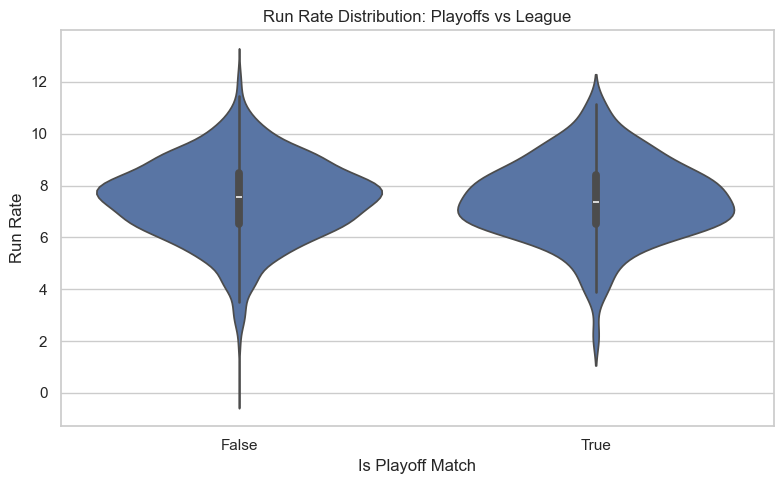

In [14]:
# Run Rate Trends in Playoff vs League Matches
plt.figure(figsize=(8,5))
sns.violinplot(data=merged, x='is_playoff', y='run_rate')
plt.title("Run Rate Distribution: Playoffs vs League")
plt.xlabel("Is Playoff Match")
plt.ylabel("Run Rate")
plt.tight_layout()
plt.show()

# Mann-Whitney U Test for Run Rates (Playoffs vs League)

In [15]:
# Import required library
from scipy.stats import mannwhitneyu

# Seperate scores into two groups based on is_play-ff flag
league_run_rates = merged[merged['is_playoff'] == False]['run_rate']
playoff_run_rates = merged[merged['is_playoff'] == True]['run_rate']

# Run the Mann-Whitney U test (non-parametric test for median difference)
u_statistic, p_value = mannwhitneyu(league_run_rates, playoff_run_rates, alternative='two-sided')

# Display results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print(" The Difference in scores between playoffs and league matches is statistically significant.")
else:
    print(" ❌ No Statistically significant differnece in scores etween playoffs and league matches.")

Mann-Whitney U Statistic: 124606.0
P-value: 0.7668706992141119
 ❌ No Statistically significant differnece in scores etween playoffs and league matches.


# Mann-Whitney U test for Run Rate by team

In [16]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Create an empty list to store results
results = []

# Loop through each unique team
teams = merged['batting_team'].unique()

for team in teams:
    # Filter data for this team
    team_data = merged[merged['batting_team'] == team]

    # Separate run rates by match type
    league_run_rates = team_data[team_data['is_playoff'] == False]['run_rate']
    playoff_run_rates = team_data[team_data['is_playoff'] == True]['run_rate']

    #Ensure enough data points in each group to make a fair comaprison
    if len(league_run_rates) >= 3 and len(playoff_run_rates) >= 3:
        # Perform the Mann-Whitney U test
        u_stat, p_val - mannwhitneyu(league_run_rates, playoff_run_rates, alternative='two-sided')

        # Append the results
        results.append({
            'Team': team,
            'p-value': round(p_val, 4),
            'Significant': '✔️' if p_val < 0.05 else '❌' 
        })

# Convert results to a DataFrame for Display
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                           Team  p-value Significant
0         Kolkata Knight Riders   0.4976           ❌
1   Royal Challengers Bangalore   0.4976           ❌
2           Chennai Super Kings   0.4976           ❌
3               Kings XI Punjab   0.4976           ❌
4              Delhi Daredevils   0.4976           ❌
5              Rajasthan Royals   0.4976           ❌
6                Mumbai Indians   0.4976           ❌
7               Deccan Chargers   0.4976           ❌
8           Sunrisers Hyderabad   0.4976           ❌
9                Delhi Capitals   0.4976           ❌
10               Gujarat Titans   0.4976           ❌


In [17]:
# Home vs away Flags:
merged['home_team']=merged['batting_team']==merged['team1']
merged['away_team']=merged['batting_team']==merged['team2']

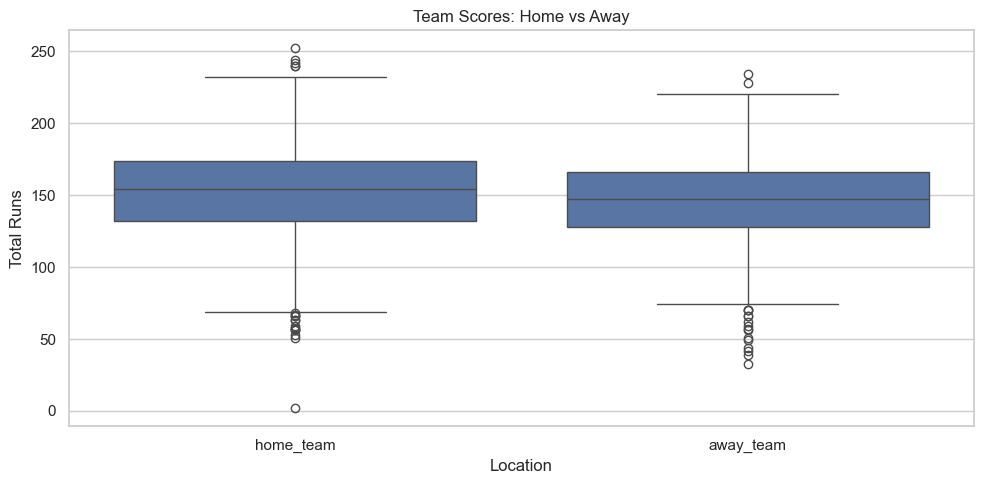

In [18]:
# Average Runs for Home vs Away
# Melt the dataset to reshape for home vs Away comparison
home_away_df = merged.melt(id_vars=['total_runs'], value_vars=['home_team','away_team'],
                          var_name='location', value_name='is_true')

# Filter for only the roots where the condition (home/away) is true
home_away_df = home_away_df[home_away_df['is_true']]

plt.figure(figsize=(10,5))
sns.boxplot(data=home_away_df, x='location', y='total_runs')
plt.title("Team Scores: Home vs Away")
plt.xlabel("Location")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

In [19]:
# Import the statistical test
from scipy.stats import mannwhitneyu

# Step 1: Extract the two groups
home_scores = merged[merged['home_team'] == True]['total_runs']
away_scores = merged[merged['away_team'] == True]['total_runs']

# Step 2: Run the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(home_scores, away_scores, alternative='two-sided')

# Step 3: Print the results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Step 4: Interpret the result
if p_value < 0.05:
    print("✅ The difference in scores between home and away matches is statistically significant.")
else:
    print("❌ No statistically significant difference in scores between home and away matches.")


Mann-Whitney U Statistic: 581106.0
P-value: 1.2376099361250964e-05
✅ The difference in scores between home and away matches is statistically significant.


In [20]:
# Shows the number of missing values in each column
print("Number of missing values")
print(merged.isnull().sum())

# Check if Any missing value exist
print("Check if Any missing value exist")
print(merged.isnull().any())

# Percent of missing values per column
print("Percent of missing values per column")
missing_percent = merged.isnull().mean() * 100
print(missing_percent)

# Show just the rows that have any missing data
print("Show just the rows that have any missing data")
missing_rows = merged[merged.isnull().any(axis=1)]
print(missing_rows.head())


Number of missing values
match_id        0
batting_team    0
total_runs      0
date            0
venue           0
team1           0
team2           0
Period          0
run_rate        0
year            0
is_playoff      0
home_team       0
away_team       0
dtype: int64
Check if Any missing value exist
match_id        False
batting_team    False
total_runs      False
date            False
venue           False
team1           False
team2           False
Period          False
run_rate        False
year            False
is_playoff      False
home_team       False
away_team       False
dtype: bool
Percent of missing values per column
match_id        0.0
batting_team    0.0
total_runs      0.0
date            0.0
venue           0.0
team1           0.0
team2           0.0
Period          0.0
run_rate        0.0
year            0.0
is_playoff      0.0
home_team       0.0
away_team       0.0
dtype: float64
Show just the rows that have any missing data
Empty DataFrame
Columns: [match_id, bat

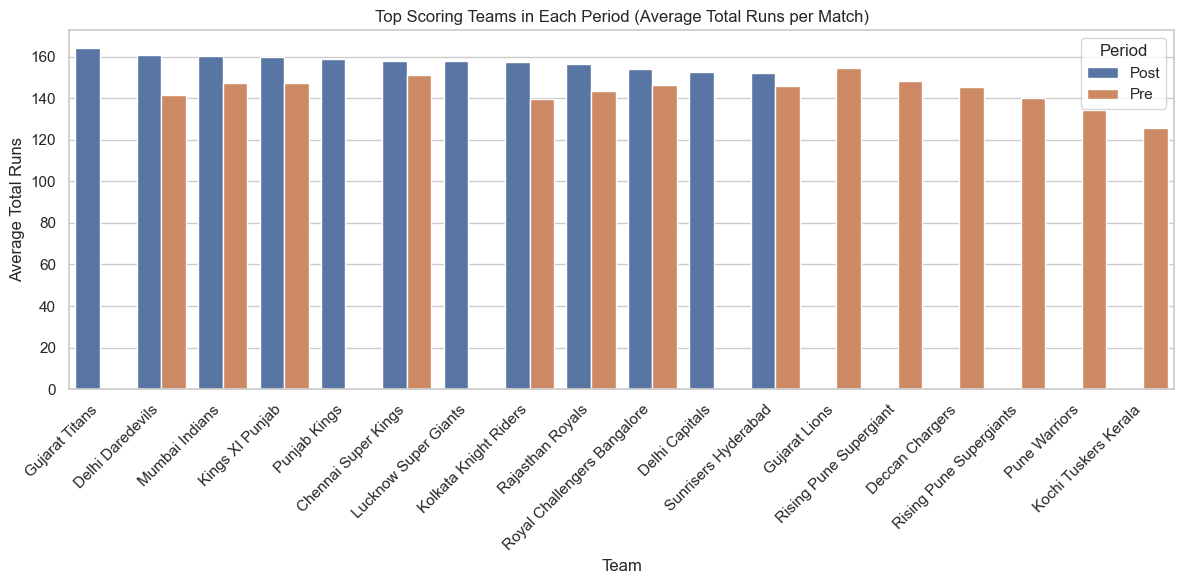

In [21]:
# Group by team and period to calculate average total runs per match
top_scoring_teams = (
    merged.groupby(['batting_team', 'Period'])['total_runs']
    .mean()
    .reset_index()
    .sort_values(by=['Period', 'total_runs'], ascending=[True, False])
)

# Plot the results using a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_scoring_teams, x='batting_team', y='total_runs', hue='Period')

# Beautify the plot
plt.title("Top Scoring Teams in Each Period (Average Total Runs per Match)")
plt.ylabel("Average Total Runs")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


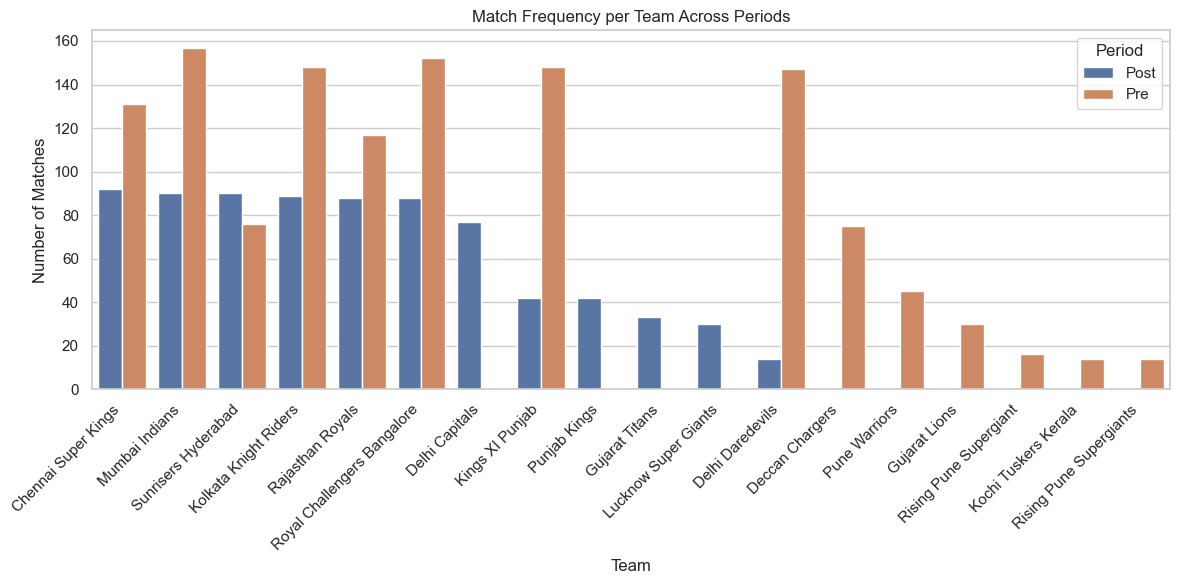

In [22]:
# Step 1: Count number of matches per team per period
match_freq = (
    merged.groupby(['batting_team', 'Period'])['match_id']
    .nunique()
    .reset_index()
    .rename(columns={'match_id': 'match_count'})
)

# Step 2: Sort for clarity (optional)
match_freq = match_freq.sort_values(by=['Period', 'match_count'], ascending=[True, False])

# Step 3: Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=match_freq, x='batting_team', y='match_count', hue='Period')

# Step 4: Beautify the plot
plt.title("Match Frequency per Team Across Periods")
plt.ylabel("Number of Matches")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [23]:
# Set minimum matches required per period
min_matches = 10

# Step 1: Count matches per team per period
match_counts = (
    merged.groupby(['batting_team', 'Period'])['match_id']
    .nunique()
    .reset_index()
    .rename(columns={'match_id': 'match_count'})
)

# Step 2: Pivot to get Pre and Post match counts in separate columns
match_counts_pivot = match_counts.pivot(index='batting_team', columns='Period', values='match_count').fillna(0)

# Step 3: Filter teams that meet minimum match criteria in both periods
qualified_teams = match_counts_pivot[
    (match_counts_pivot.get('Pre', 0) >= min_matches) &
    (match_counts_pivot.get('Post', 0) >= min_matches)
].index.tolist()

# Step 4: Filter original merged dataset to include only qualified teams
filtered_merged = merged[merged['batting_team'].isin(qualified_teams)]

# Display filtered team list and shape of filtered dataset
print("Qualified Teams:", qualified_teams)
print("Filtered Dataset Size:", filtered_merged.shape)


Qualified Teams: ['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
Filtered Dataset Size: (1669, 13)


In [24]:
filtered_merged.head()

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year,is_playoff,home_team,away_team
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008,False,False,True
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008,False,True,False
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008,False,False,True
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008,False,True,False
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008,False,True,False


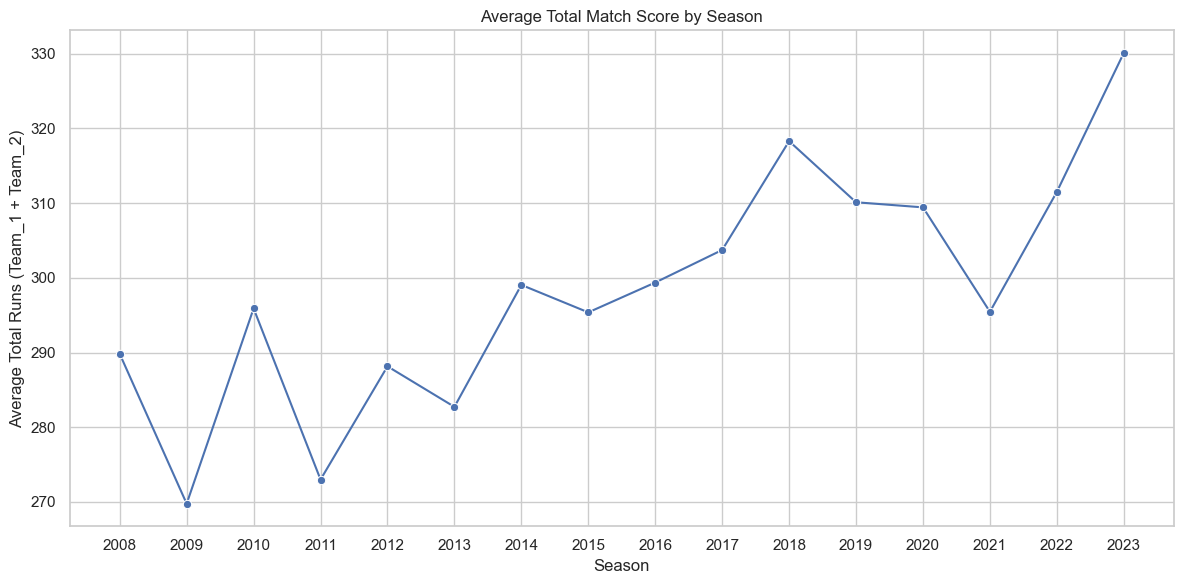

In [25]:
# Step 1: Compute total runs by match_id and batting_time
match_totals =(
    merged.groupby(['match_id','batting_team'])['total_runs']
    .sum()
    .reset_index()
)

# Step 2: Sum both team totals to get the total score for each match
match_scores = (
    match_totals.groupby('match_id')['total_runs']
    .sum()
    .reset_index()
    .rename(columns={'total_runs':'total_match_score'})
)

# Step 3: Merge with match_info to get the match date
match_info = match_info_data[['id','date']].copy()
match_info['date'] = pd.to_datetime(match_info['date'], errors='coerce')
match_info.rename(columns={'id': 'match_id'}, inplace=True)

# Merge scores with date info
match_scores = pd.merge(match_scores, match_info, on='match_id')

# Step 4: Extract Year
match_scores['year'] = match_scores['date'].dt.year

# Step 5: Calculate average total match score per season
seasonal_scores = (
    match_scores.groupby('year')['total_match_score']
    .mean()
    .reset_index()
    .rename(columns={'total_match_score':'avg_total_match_score'})
)

# Step 6 : Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_scores,x='year',y='avg_total_match_score',marker='o')
plt.title("Average Total Match Score by Season")
plt.xlabel("Season")
plt.ylabel("Average Total Runs (Team_1 + Team_2)")
plt.xticks(seasonal_scores['year'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze Average Team Scores Over Time

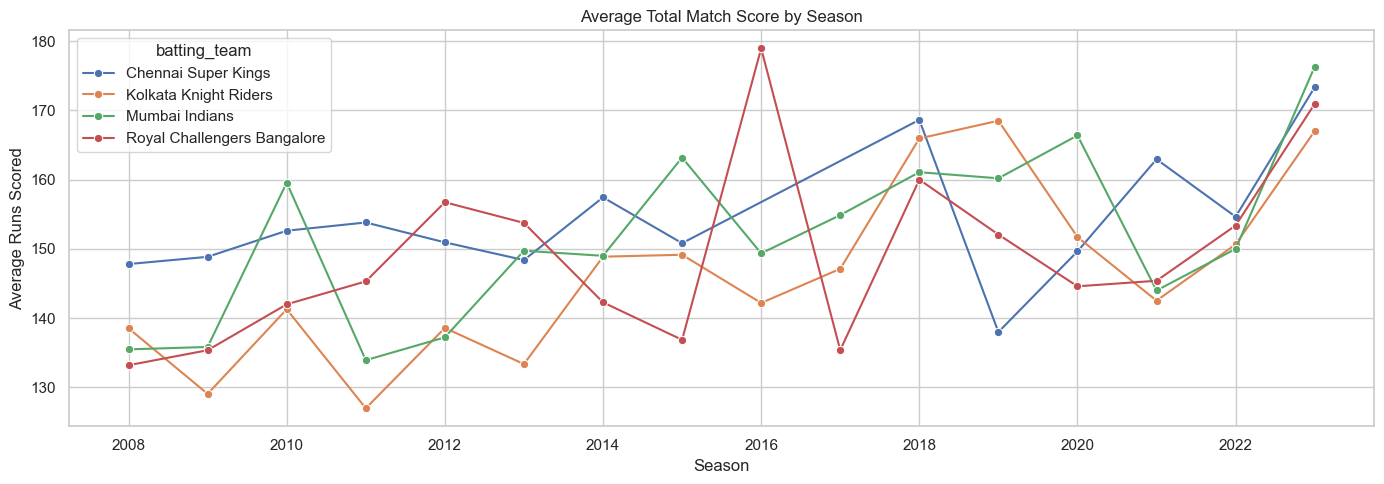

In [26]:
# Compute average runs scored by each team per season
team_scores_by_year = (
    merged.groupby(['batting_team', 'year'])['total_runs']
    .mean()
    .reset_index()
    .rename(columns = {'total_runs' : 'avg_score'})
)

# Plot for a few major teams
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
top_team = ['Chennai Super Kings', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders']
sns.lineplot(data=team_scores_by_year[team_scores_by_year['batting_team'].isin(top_team)],
            x='year', y='avg_score',hue='batting_team', marker='o')
plt.title("Average Total Match Score by Season")
plt.xlabel("Season")
plt.ylabel("Average Runs Scored")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import skew, kurtosis
import pandas as pd

# Claculate skewness and kurtosis
print("Skewness of total_runs:", skew(merged['total_runs']))
print("Kurtosis of total_runs:", kurtosis(merged['total_runs']))

print("Skewness of run_rate:", skew(merged['run_rate']))
print("Kurtosis of run_rate:", kurtosis(merged['run_rate']))

# Convert boolean columns to int
merged['home_team_int'] = merged['home_team'].astype(int)
merged['away_team_int'] = merged['away_team'].astype(int)

# Correlation matrix
correlation_matrix = merged[['total_runs', 'run_rate', 'year', 'home_team_int', 'away_team_int']].corr()
print("\nVorrelation Matrix:")
print(correlation_matrix)

Skewness of total_runs: -0.316126444960667
Kurtosis of total_runs: 0.597009096235078
Skewness of run_rate: -0.31612644496066417
Kurtosis of run_rate: 0.5970090962350754

Vorrelation Matrix:
               total_runs  run_rate      year  home_team_int  away_team_int
total_runs       1.000000  1.000000  0.208131       0.096941      -0.096941
run_rate         1.000000  1.000000  0.208131       0.096941      -0.096941
year             0.208131  0.208131  1.000000       0.000238      -0.000238
home_team_int    0.096941  0.096941  0.000238       1.000000      -1.000000
away_team_int   -0.096941 -0.096941 -0.000238      -1.000000       1.000000


# League-wise Average Runs per Team Per match by season

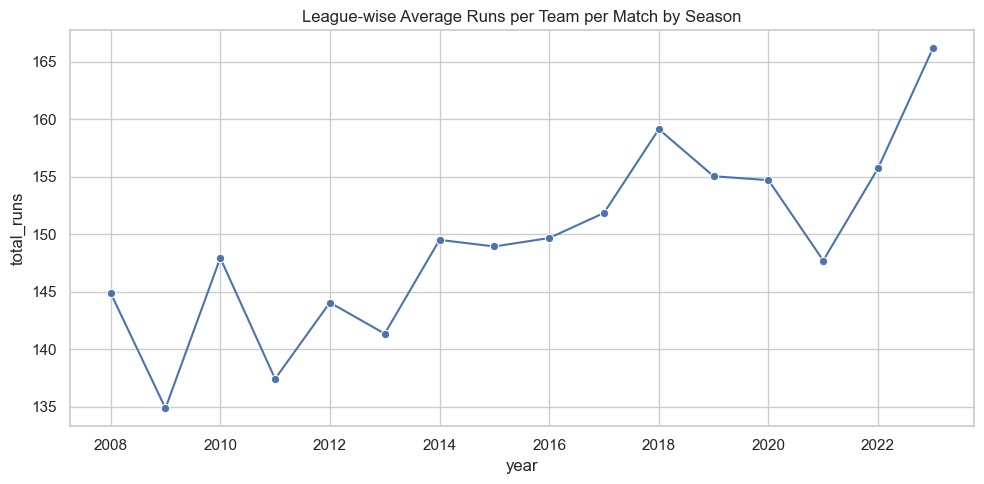

In [28]:
seasonal_avg = merged.groupby('year')['total_runs'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data = seasonal_avg, x='year', y='total_runs', marker='o')
plt.title("League-wise Average Runs per Team per Match by Season")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram and KDE of Total Runs per match by Period

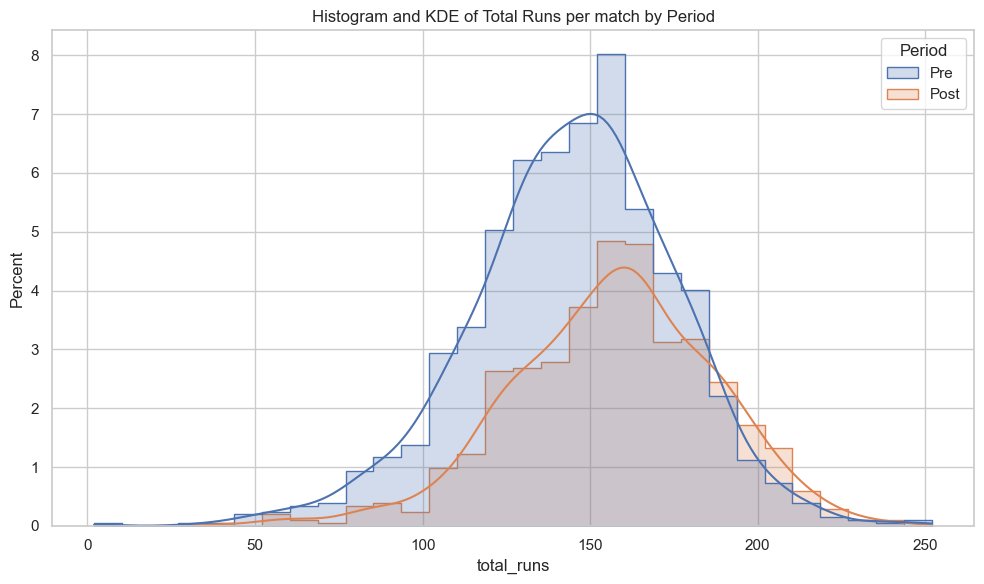

In [41]:
# Distribution Plots...
plt.figure(figsize=(10,6))
sns.histplot(data=merged,x='total_runs',hue='Period',element='step',stat='percent',kde=True,bins=30)
plt.title("Histogram and KDE of Total Runs per match by Period")
plt.tight_layout()
plt.show()

In [48]:
# Hypothesis Testing
u_stat, p_val = mannwhitneyu(pre_scores, post_scores, alternative = 'two-sided')
print("Mann-Whitney U Test : U-statistic =", u_stat,", p-value =", p_val)

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

effect_size = cohen_d(post_scores, pre_scores)
print("Cohen's d effect Size:", effect_size)

Mann-Whitney U Test : U-statistic = 381621.5 , p-value = 1.454889995517028e-17
Cohen's d effect Size: 0.014118121481058251


In [55]:
# Bootstap Confidence Interval

def bootstrap_diff_means(x, y, n_bootstrap=1000):
    diffs = [np.mean(resample(y)) - np.mean(resample(x)) for _ in range(n_bootstrap)]
    return np.percentile(diffs, [2.5, 97.5]), np.mean(diffs)

ci_bounds, mean_diff = bootstrap_diff_means(pre_scores, post_scores)
print("95% Confindence Interval:", ci_bounds, "\nMean Difference:", mean_diff)

95% Confindence Interval: [ 9.33439205 14.51650406] 
Mean Difference: 11.955175179070357


In [56]:
# Linear Regression
seasonal_data = merged.groupby('year')['total_runs'].mean().reset_index()
X = sm.add_constant(seasonal_data['year'])
Y = seasonal_data['total_runs']
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_runs   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     25.68
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           0.000172
Time:                        11:06:04   Log-Likelihood:                -47.087
No. Observations:                  16   AIC:                             98.17
Df Residuals:                      14   BIC:                             99.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2569.0983    536.414     -4.789      0.0

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [58]:
seasonal_data

,year,total_runs
0,2008,144.905172
1,2009,134.877193
2,2010,147.950000
3,2011,137.434483
4,2012,144.074324
5,2013,141.361842
6,2014,149.525000
7,2015,148.948718
8,2016,149.683333
9,2017,151.864407


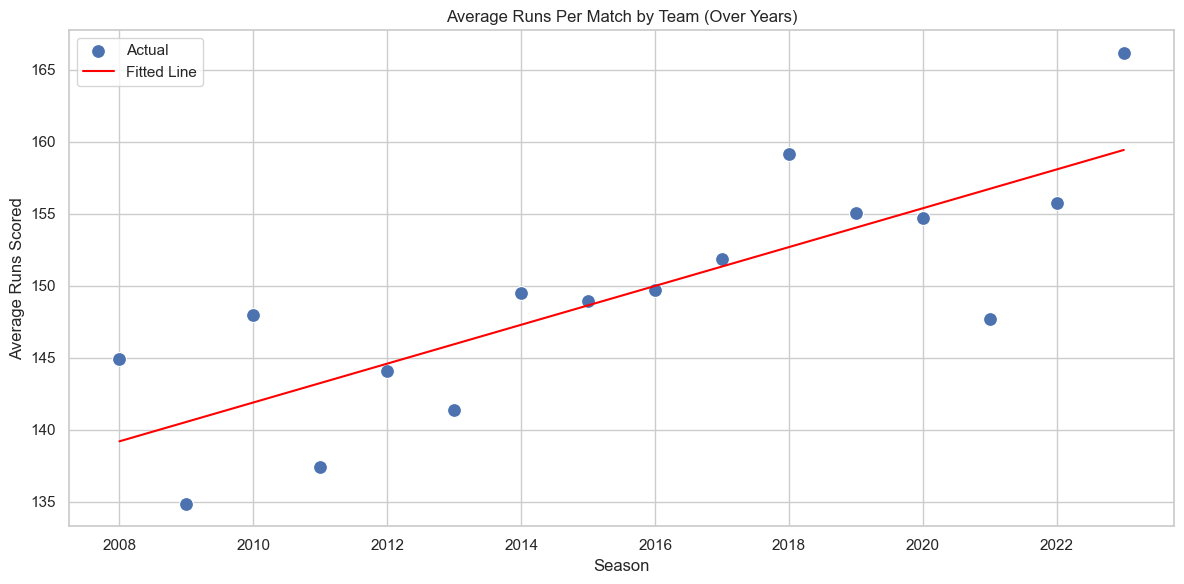

In [59]:
# predict values using the model 
seasonal_data['predicted']= model.predict(X)

# plot actual vs predicted 
plt.figure(figsize=(12,6))
sns.scatterplot(data=seasonal_data,x='year',y='total_runs',label='Actual',s=100)
sns.lineplot(data=seasonal_data,x='year',y='predicted', label='Fitted Line', color='red')


plt.title("Average Runs Per Match by Team (Over Years)")
plt.xlabel("Season")
plt.ylabel("Average Runs Scored")
plt.grid(True)
plt.tight_layout()
plt.show()